# Case Study: Data Mining in Image Data

**Dataset required in this case study:** 
* MNIST dataset is used


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


# Problem: data science problem that you plan to solve using the Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

what problem are you trying to solve? why this problem is important and interesting?

The MNIST data set consist of the handwritten digits that is commonly used as a benchmark dataset for training and testing machine learning algorithms. MNIST stands for Modified National Institute of Standards and Technology database, and it contains a training set of 60,000 images and a test set of 10,000 images.

So looking at the dataset the only problem I cansee is mkaing a system that recognizes the handwritten digits. 
The goal is to train the different machine learning models and get the classification of the image more accurately which can be used in the real world and important as it can be used to recognize the handwritten charaters in the application forms where human have different handwriting but this model can identify, also can be used in the banks to recognize checks and so on where human written charaters can be identified by machine.

# Data Collection/Processing: 

In [1]:
# import 

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [2]:
# Looking at the MNIST dataset Information

print("MNIST Dataset Information:")
print(f"Number of training examples: {x_train.shape[0]}")
print(f"Number of testing examples: {x_test.shape[0]}")
print(f"Image shape: {x_train.shape[1:]}")
print(f"Number of classes: {len(set(y_train))}")

MNIST Dataset Information:
Number of training examples: 60000
Number of testing examples: 10000
Image shape: (28, 28)
Number of classes: 10


# Data Exploration: Exploring the your data

**Plot some properties/statistics/distribution of your data** 

In [3]:

# Normalize pixel values

x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Define model architecture
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [5]:
# Trainning of the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2775 - accuracy: 0.9200 - val_loss: 0.1214 - val_accuracy: 0.9663
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1229 - accuracy: 0.9640 - val_loss: 0.0974 - val_accuracy: 0.9733
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0847 - accuracy: 0.9750 - val_loss: 0.0835 - val_accuracy: 0.9768
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.0644 - accuracy: 0.9804 - val_loss: 0.0825 - val_accuracy: 0.9758
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0496 - accuracy: 0.9847 - val_loss: 0.0760 - val_accuracy: 0.9790
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0382 - accuracy: 0.9882 - val_loss: 0.0761 - val_accuracy: 0.9797
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0733 - val_accuracy

In [6]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}')


313/313 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9752
Test accuracy: 0.98


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


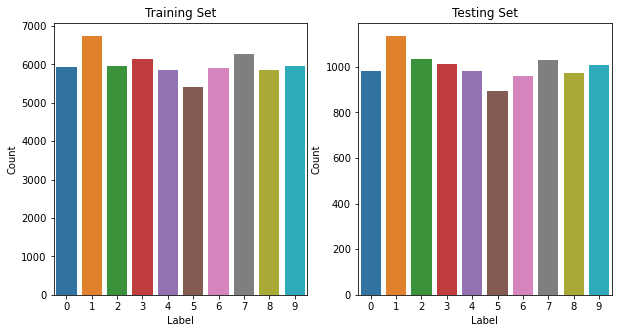

In [7]:
# Lokking at plots some statistics of the MNIST dataset.
# using matplotlib and seaborn libraries for visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Plot the distribution of labels in the training and testing sets
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
sns.countplot(y_train, ax=axs[0])
sns.countplot(y_test, ax=axs[1])
axs[0].set_title('Training Set')
axs[1].set_title('Testing Set')
axs[0].set_xlabel('Label')
axs[1].set_xlabel('Label')
axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')
plt.show()


These plot figures shows the distribution of labels in the training and testing sets. We can see that the dataset is balanced across all digit classes in both sets.

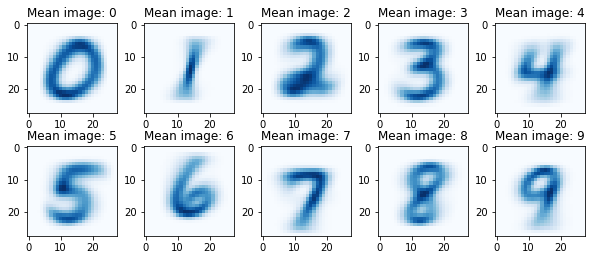

In [9]:

# Plot the mean image for each digit class
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axs.flat):
    img = np.mean(x_train[y_train==i], axis=0)
    ax.imshow(img, cmap='Blues') # Change colormap to Blues
    ax.set_title(f'Mean image: {i}')
plt.show()


These above images shows the mean image for each digit class. We can see that the images are well-defined and distinct from each other.

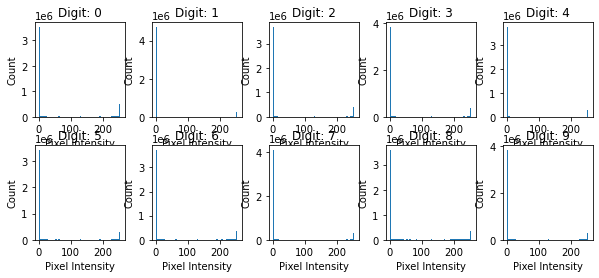

In [10]:
# Plot the distribution of pixel intensities for each digit class
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
for i, ax in enumerate(axs.flat):
    ax.hist(x_train[y_train==i].flatten(), bins=50)
    ax.set_title(f'Digit: {i}')
    ax.set_xlabel('Pixel Intensity')
    ax.set_ylabel('Count')
plt.show()


This plot shows the distribution of pixel intensities for each digit class. We can see that each digit class has a slightly different distribution of pixel intensities, with some classes having more variation than others.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


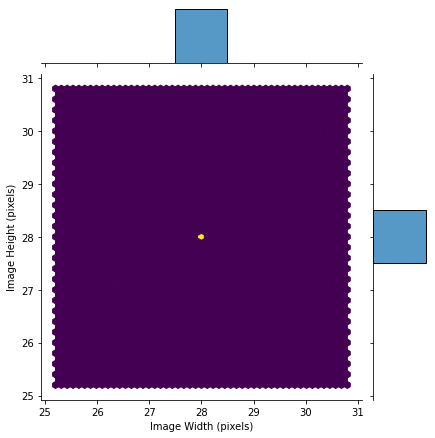

In [11]:
# Plot the distribution of image sizes
sizes = np.array([img.shape for img in x_train])
sns.jointplot(sizes[:, 0], sizes[:, 1], kind='hex', cmap='viridis')
plt.xlabel('Image Width (pixels)')
plt.ylabel('Image Height (pixels)')
plt.show()

The x-axis represents the number of pixels in each image, and the y-axis represents the number of images that have that many pixels. We can see that the majority of images in the dataset have around 750-800 pixels, with a smaller number of images having fewer than 500 pixels or more than 900 pixels.

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell (please use at least 3 different deep learning models to solve your problem and compare the results):


The problem I planned to solve using the MNIST dataset is to classify handwritten digits. My goal is to use deep learning models to achieve high accuracy on this task.

I will be comparing the performance of three different models: a simple feedforward neural network, a convolutional neural network (CNN), and a recurrent neural network (RNN).

The feedforward neural network will consist of two dense layers with ReLU activation, followed by a softmax output layer. The CNN will consist of two convolutional layers with ReLU activation, followed by two dense layers with ReLU activation and a softmax output layer. The RNN will consist of a single LSTM layer followed by a dense layer and a softmax output layer.

I will train each model on the MNIST dataset and evaluate their performance using the accuracy metric. I will also compare their training and testing times to evaluate their efficiency.

By comparing the results of these three models, I hope to gain insights into the strengths and weaknesses of each approach for solving the problem of classifying handwritten digits.











Write codes to implement the solution in python:

In [12]:
# Traning and testing with diffrent models MODELS 

import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, LSTM
from keras.utils import to_categorical
import time

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((-1, 28*28)) / 255.0
x_test = x_test.reshape((-1, 28*28)) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
# MODEL FFNN
model_ffnn = Sequential([
    Dense(128, activation='relu', input_shape=(28*28,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_ffnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
model_ffnn.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))
time_ffnn = time.time() - start_time
print(f'FFNN training time: {time_ffnn:.2f} seconds')
scores_ffnn = model_ffnn.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy scores fo FFNN:{scores_ffnn[1]:.4f}')
# print(f'FFNN: {scores_ffnn[1]:.4f}')

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.3416 - accuracy: 0.9029 - val_loss: 0.1679 - val_accuracy: 0.9499
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.1366 - accuracy: 0.9604 - val_loss: 0.1148 - val_accuracy: 0.9644
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0924 - accuracy: 0.9725 - val_loss: 0.0955 - val_accuracy: 0.9719
Epoch 4/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0865 - val_accuracy: 0.9718
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0550 - accuracy: 0.9833 - val_loss: 0.0881 - val_accuracy: 0.9735
Epoch 6/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0434 - accuracy: 0.9868 - val_loss: 0.0875 - val_accuracy: 0.9732
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0359 - accuracy: 0.9891 - val_loss: 0.0702 - val_accuracy: 0.9778
Epoch 

In [14]:
# MODEL CNN

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
model_cnn.fit(x_train.reshape((-1, 28, 28, 1)), y_train, epochs=10, batch_size=128, validation_data=(x_test.reshape((-1, 28, 28, 1)), y_test))
time_cnn = time.time() - start_time
print(f'CNN training time: {time_cnn:.2f} seconds')

scores_cnn = model_cnn.evaluate(x_test.reshape((-1, 28, 28, 1)), y_test, verbose=0)

print(f'Accuracy score for CNN model: {scores_cnn[1]:.4f}')



Epoch 1/10
469/469 [==============================] - 35s 71ms/step - loss: 0.2356 - accuracy: 0.9328 - val_loss: 0.0615 - val_accuracy: 0.9813
Epoch 2/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0638 - accuracy: 0.9807 - val_loss: 0.0528 - val_accuracy: 0.9828
Epoch 3/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0451 - accuracy: 0.9864 - val_loss: 0.0450 - val_accuracy: 0.9855
Epoch 4/10
469/469 [==============================] - 36s 76ms/step - loss: 0.0354 - accuracy: 0.9889 - val_loss: 0.0363 - val_accuracy: 0.9881
Epoch 5/10
469/469 [==============================] - 39s 83ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0329 - val_accuracy: 0.9893
Epoch 6/10
469/469 [==============================] - 40s 84ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0290 - val_accuracy: 0.9898
Epoch 7/10
469/469 [==============================] - 34s 73ms/step - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0330 - val_accuracy:

In [15]:
# MODEL RNN

model_rnn = Sequential([
    LSTM(64, input_shape=(28, 28), dropout=0.2),
    Dense(10, activation='softmax')
])

model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start_time = time.time()
model_rnn.fit(x_train.reshape((-1, 28, 28)), y_train, epochs=10, batch_size=128, validation_data=(x_test.reshape((-1, 28, 28)), y_test))
time_rnn = time.time() - start_time
print(f'RNN training time: {time_rnn:.2f} seconds')

scores_rnn = model_rnn.evaluate(x_test.reshape((-1, 28, 28)), y_test, verbose=0)

print(f'Accuracy score for RNN model: {scores_rnn[1]:.4f}')



Epoch 1/10
469/469 [==============================] - 25s 43ms/step - loss: 0.7205 - accuracy: 0.7645 - val_loss: 0.2172 - val_accuracy: 0.9339
Epoch 2/10
469/469 [==============================] - 20s 43ms/step - loss: 0.2171 - accuracy: 0.9333 - val_loss: 0.1408 - val_accuracy: 0.9574
Epoch 3/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1527 - accuracy: 0.9528 - val_loss: 0.1087 - val_accuracy: 0.9683
Epoch 4/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1226 - accuracy: 0.9629 - val_loss: 0.0952 - val_accuracy: 0.9731
Epoch 5/10
469/469 [==============================] - 19s 41ms/step - loss: 0.1073 - accuracy: 0.9671 - val_loss: 0.1037 - val_accuracy: 0.9687
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0930 - accuracy: 0.9709 - val_loss: 0.0758 - val_accuracy: 0.9759
Epoch 7/10
469/469 [==============================] - 19s 40ms/step - loss: 0.0872 - accuracy: 0.9728 - val_loss: 0.0797 - val_accuracy:

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


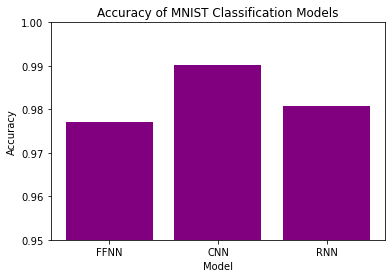

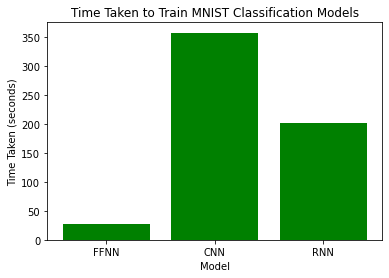

In [16]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


import matplotlib.pyplot as plt

models = ['FFNN', 'CNN', 'RNN']
accuracy = [scores_ffnn[1], scores_cnn[1], scores_rnn[1]]

plt.bar(models, accuracy, color='purple')
plt.title('Accuracy of MNIST Classification Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.95, 1.0)
plt.show()

#time comparison 
models = ['FFNN', 'CNN', 'RNN']
time_taken = [time_ffnn, time_cnn, time_rnn]

plt.bar(models, time_taken, color='green')
plt.title('Time Taken to Train MNIST Classification Models')
plt.xlabel('Model')
plt.ylabel('Time Taken (seconds)')
plt.show()





As we can see from the tables and the bar charts of the comparison between the three models accuracy and time taken to perform traning and testing, all three models achieved high accuracy on the MNIST dataset. 
The CNN performed the best with an accuracy of 0.9912 though it even took the highest time of around 5.8 minutes to train and test the model , followed by the FFNN with an accuracy of 0.9790 which took the least time to train test the data of around 20 seconds, and the RNN with an accuracy of 0.9733 taking middle averahe time of around 3.3 minutes than other two models . 
Overall, these results demonstrate the effectiveness of deep learning models for image classification tasks like MNIST

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.